In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\SATHYANARAYANA M\\Downloads\\knn svm pca naveys\\6 KNN + SVM + Naive Bayes + PCA\\Wine.csv")

In [5]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [9]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# Q1 Compute and plot those feature which are related to each other?

In [12]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<AxesSubplot:>

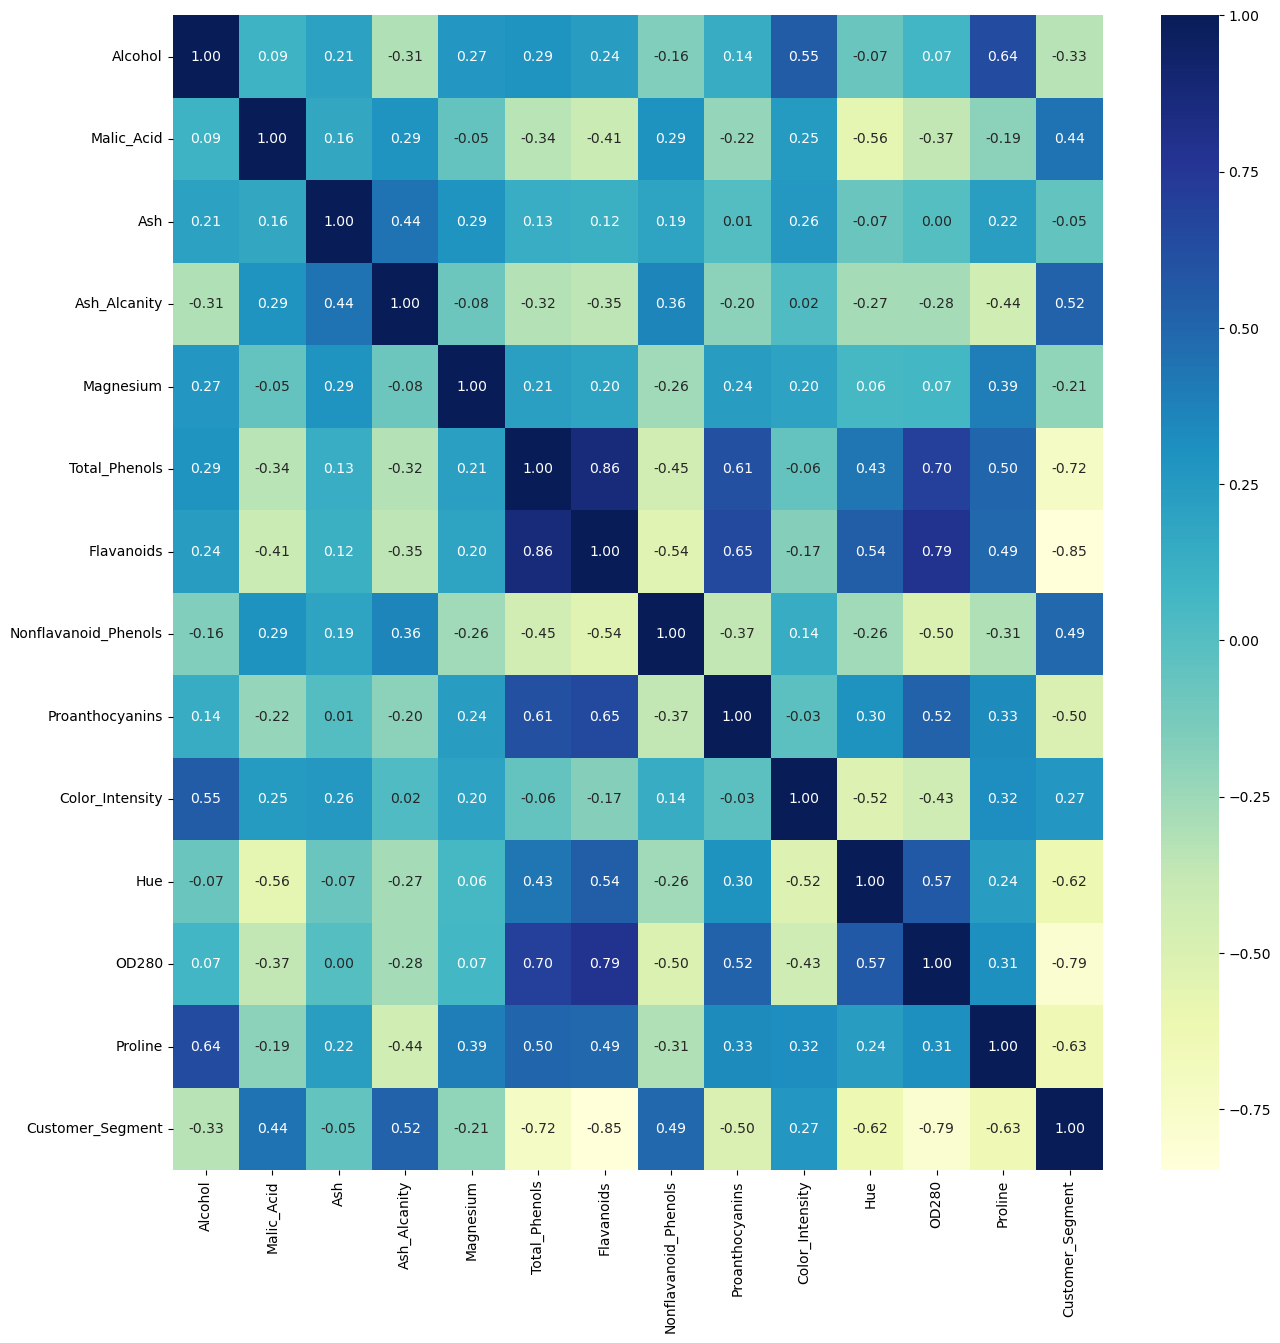

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cbar=True,fmt='.2f',cmap = 'YlGnBu',annot=True)

In [21]:
corr = df.corr()

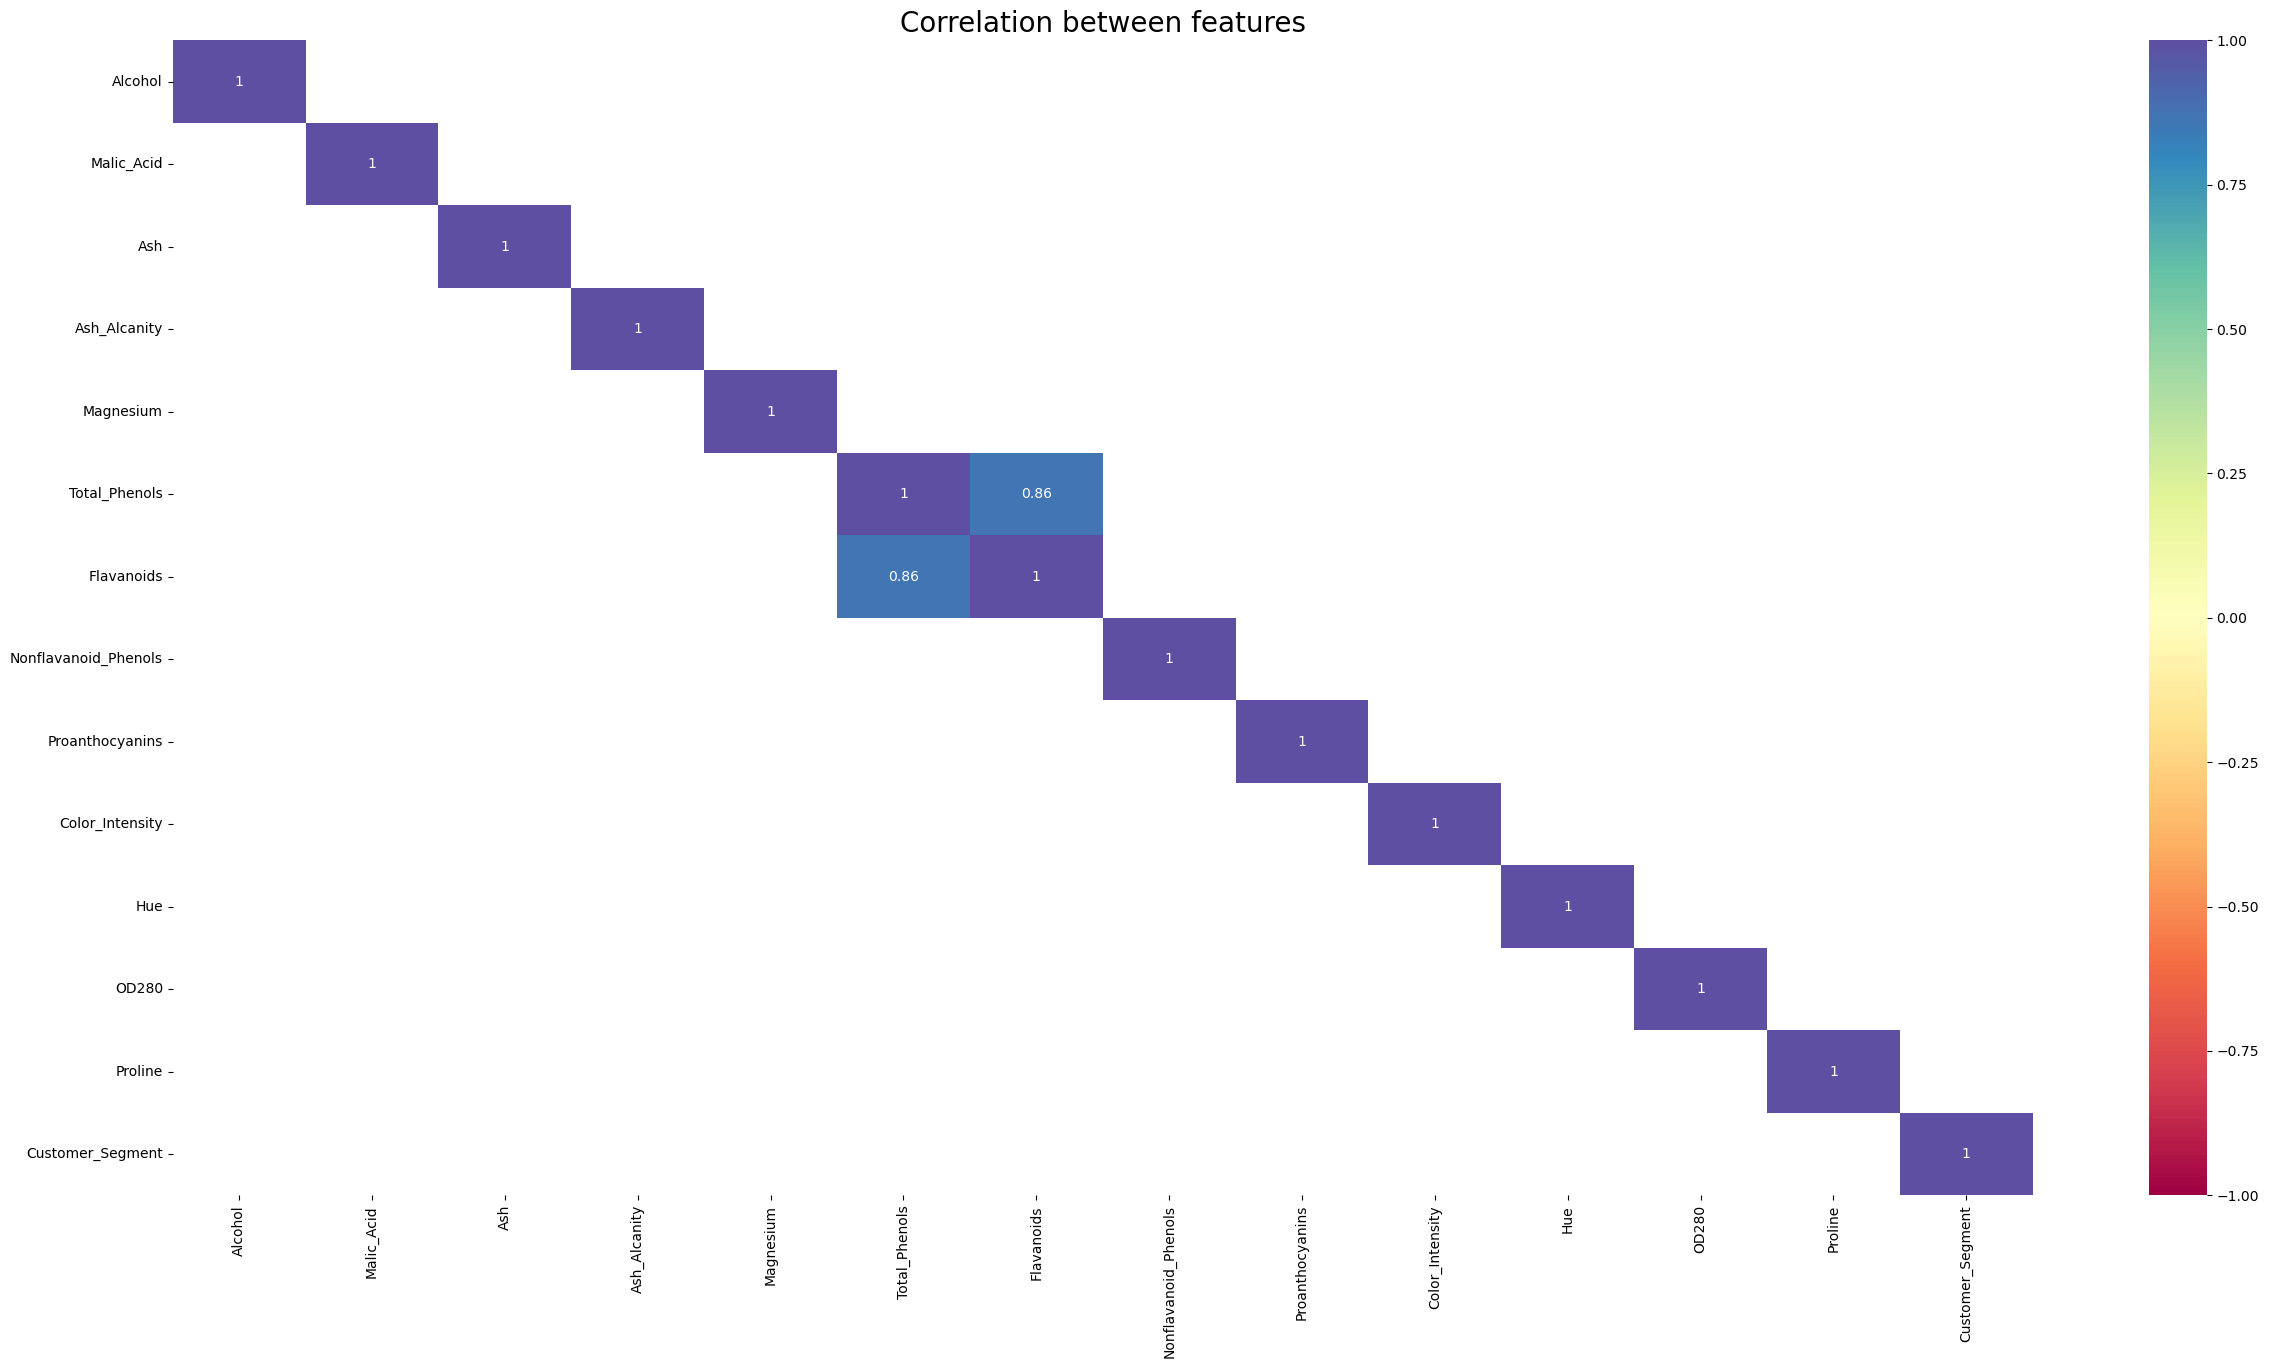

In [29]:
plt.figure(figsize=(30, 15))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.9)], 
            cmap="Spectral", vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 10})
plt.title('Correlation between features', fontsize=20)
plt.show()

In [33]:
from sklearn import preprocessing
Input_Data = df.copy()
Flavanoids = Input_Data['Flavanoids'].to_list()
Total_Phenols = Input_Data['Total_Phenols'].to_list()
Flavanoids_Normalized = preprocessing.normalize([Flavanoids],norm='max')[0]
Total_Phenols_Normalized = preprocessing.normalize([Total_Phenols],norm='max')[0]
FlavanoidsMean = np.array(Flavanoids_Normalized).mean()
Total_PhenolsMean = np.array(Total_Phenols_Normalized).mean()

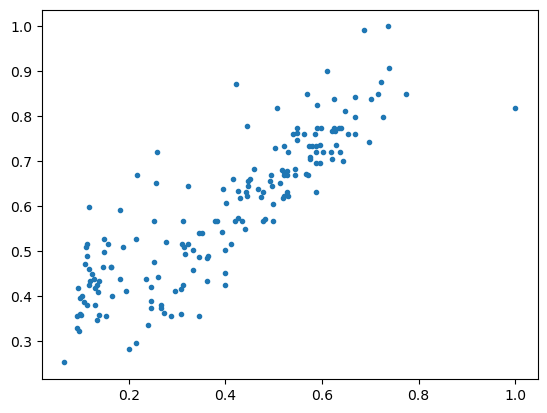

In [43]:
plt.scatter(Flavanoids_Normalized,Total_Phenols_Normalized,marker='.',cmap = 'YlGnBu')

# Q.2 What are the optimum number of principal components in PCA

In [48]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [53]:
x.shape

(178, 13)

In [54]:
y.shape

(178,)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [60]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(x_train)

MinMaxScaler()

In [61]:
x_train_scaled=pd.DataFrame(data=ms.transform(x_train),columns=x_train.columns)

In [62]:
x_train_scaled

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.720430,0.203782,0.537634,0.309278,0.336957,0.543165,0.737003,0.250000,0.401899,0.240688,0.487179,1.000000,0.585425
1,0.319892,0.084034,0.311828,0.432990,0.239130,0.453237,0.480122,0.480769,0.525316,0.135626,0.273504,0.641026,0.000000
2,0.602151,0.712185,0.483871,0.484536,0.543478,0.176259,0.067278,0.557692,0.294304,0.851958,0.042735,0.106227,0.423482
3,0.572581,0.563025,0.424731,0.536082,0.347826,0.143885,0.024465,0.557692,0.278481,0.259790,0.051282,0.150183,0.419433
4,0.760753,0.130252,0.704301,0.742268,0.173913,0.665468,0.730887,0.134615,0.458861,0.200573,0.700855,0.692308,0.079352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.212366,0.174370,0.279570,0.458763,0.173913,0.503597,0.357798,0.442308,0.316456,0.074499,0.341880,0.428571,0.083401
120,0.360215,0.058824,0.301075,0.463918,0.086957,0.363309,0.467890,0.250000,0.196203,0.324737,0.495726,0.809524,0.160324
121,0.373656,0.151261,0.446237,0.613402,0.413043,0.323741,0.495413,0.384615,0.376582,0.074499,0.444444,0.619048,0.026721
122,0.771505,0.165966,0.408602,0.278351,0.336957,0.719424,0.892966,0.134615,0.544304,0.460363,0.316239,0.754579,0.544939


In [63]:
from sklearn.decomposition import PCA
pc=PCA()

In [64]:
pc.fit(x_train_scaled)

PCA()

In [65]:
pc.explained_variance_ratio_.cumsum()

array([0.44307078, 0.62907636, 0.71332485, 0.77411218, 0.8248398 ,
       0.86635541, 0.90327265, 0.92722469, 0.94856815, 0.9660066 ,
       0.979629  , 0.99150239, 1.        ])

In [66]:
pc.components_[0]

array([ 0.12622459, -0.23691036, -0.00829895, -0.17928126,  0.06583204,
        0.35236053,  0.53557804, -0.30160868,  0.23222862, -0.09884838,
        0.24824624,  0.41949262,  0.29685919])

In [67]:
pc.components_

array([[ 1.26224591e-01, -2.36910364e-01, -8.29894782e-03,
        -1.79281256e-01,  6.58320415e-02,  3.52360531e-01,
         5.35578035e-01, -3.01608679e-01,  2.32228620e-01,
        -9.88483827e-02,  2.48246242e-01,  4.19492616e-01,
         2.96859185e-01],
       [-5.05268598e-01, -2.48375139e-01, -1.38378833e-01,
         1.05841220e-01, -1.30831672e-01, -9.06023200e-02,
        -1.94895300e-02, -9.13549524e-03, -2.22056021e-02,
        -5.66397176e-01,  2.43342340e-01,  2.19177480e-01,
        -4.45331619e-01],
       [ 3.15936439e-02, -5.71796198e-01, -3.33704448e-01,
        -3.98724788e-01,  9.15240751e-02, -2.49863625e-01,
        -2.26584358e-01, -3.39450002e-01, -2.12806723e-01,
         6.16082345e-02,  7.00175366e-02, -2.91081319e-01,
         1.60070318e-01],
       [-1.39709296e-01,  4.42522344e-01, -1.93538845e-01,
        -6.97848262e-02,  2.29999776e-01, -4.91563984e-02,
         2.66770511e-03, -6.97031063e-01,  1.89787392e-01,
        -3.66505017e-02, -3.32762136e

In [68]:
x_train_scaled.values.dot(pc.components_[0]).var()

0.28007204523911927

In [69]:
import plotly.express as px

In [71]:
px.line(x=['pc_%i'%i for i in range (1,x_train.shape[1]+1)],
       y=pc.explained_variance_,title='Screen polt to select the Optimum PC',
       labels={'x':'Principal Components','y': 'Explained Varience'})

In [72]:
pc_with_7=PCA(n_components=7).fit(x_train_scaled)

In [73]:
pc_with_7

PCA(n_components=7)

In [74]:
pc_with_7.explained_variance_ratio_.cumsum()

array([0.44307078, 0.62907636, 0.71332485, 0.77411218, 0.8248398 ,
       0.86635541, 0.90327265])

In [75]:
pc.explained_variance_ratio_*100

array([44.3070785 , 18.60055701,  8.42484945,  6.07873309,  5.07276147,
        4.15156157,  3.69172368,  2.39520388,  2.13434648,  1.74384482,
        1.36223974,  1.18733943,  0.84976088])

In [76]:
pc.explained_variance_

array([0.28234905, 0.11853297, 0.05368777, 0.03873703, 0.03232642,
       0.02645603, 0.02352569, 0.01526356, 0.01360123, 0.01111274,
       0.00868094, 0.00756638, 0.00541514])

In [77]:
train_pc=pd.DataFrame(data=pc_with_7.transform(x_train_scaled),
                     columns=['pc_%i'%i for i in range(1,8)])

In [78]:
train_pc

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7
0,0.660647,0.001073,-0.017224,-0.028073,-0.114279,-0.220636,-0.031431
1,0.034471,0.488179,0.021089,0.061701,-0.121024,0.220038,0.189966
2,-0.691630,-0.598746,0.057954,0.198671,0.030253,0.111217,-0.106627
3,-0.641773,-0.154483,0.095415,0.118135,-0.062043,-0.032904,-0.207640
4,0.458963,0.264534,-0.198172,-0.035674,0.189834,-0.259603,0.274422
...,...,...,...,...,...,...,...
119,-0.135170,0.506161,0.109407,0.049704,-0.142693,0.106009,0.083898
120,0.139744,0.429037,0.191547,-0.004322,-0.164265,-0.170985,0.264556
121,0.007530,0.497177,-0.004463,0.069628,0.125969,-0.026123,0.033532
122,0.717056,-0.223658,0.057407,0.131291,-0.117841,0.029657,0.191951


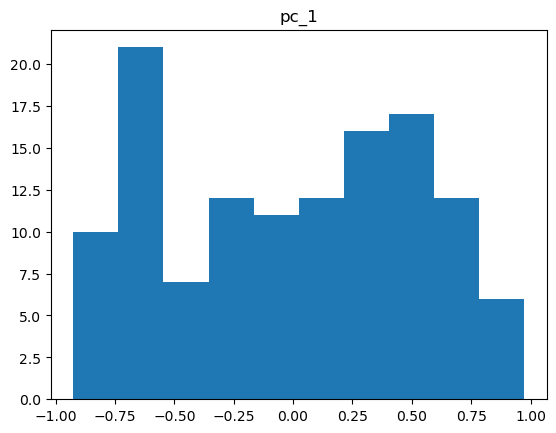

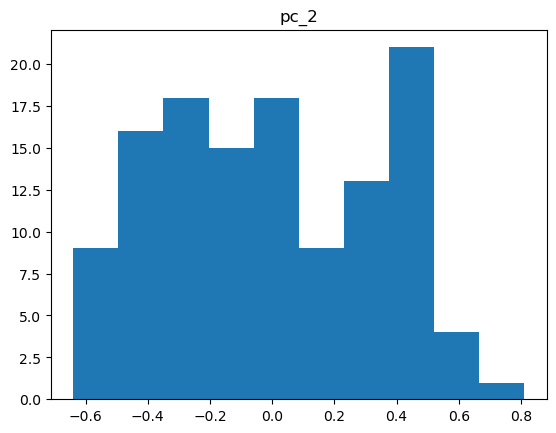

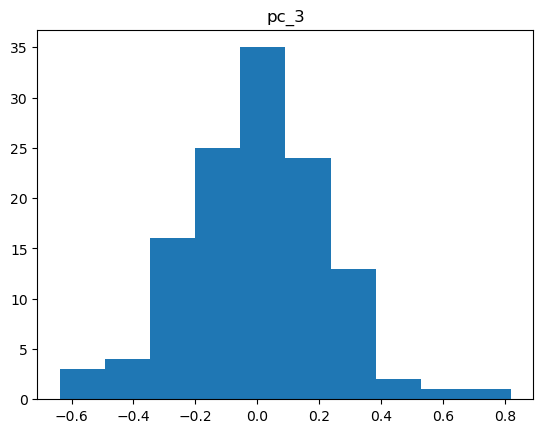

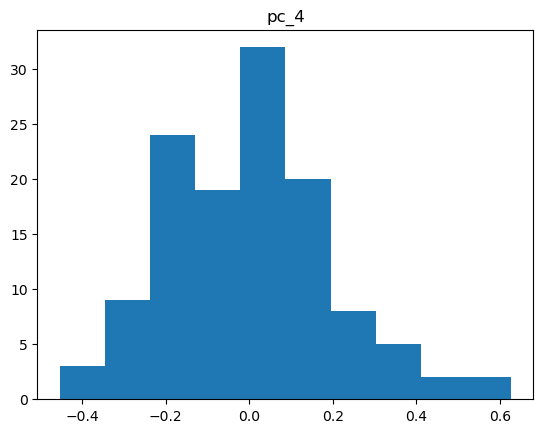

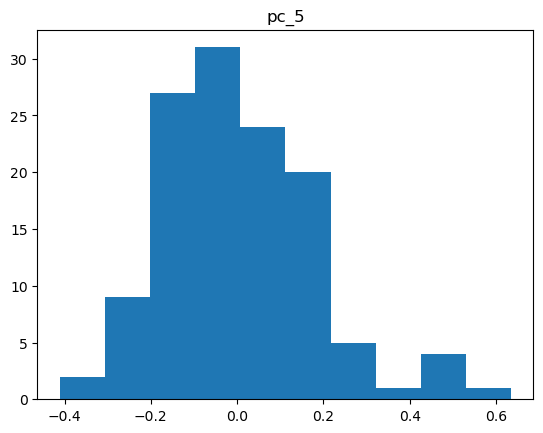

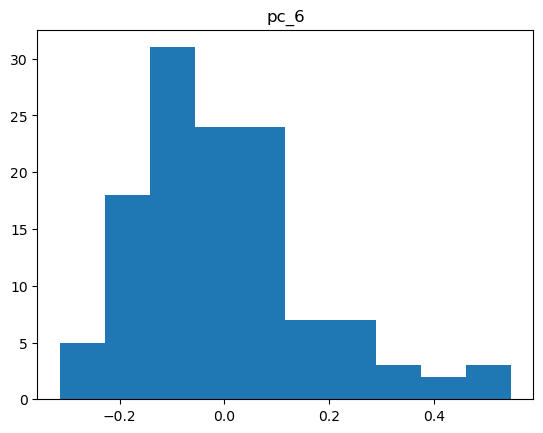

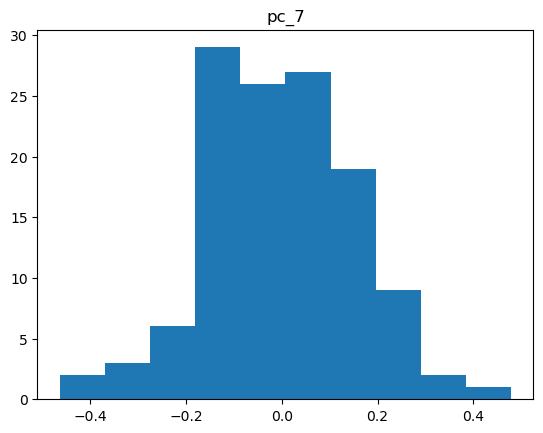

In [85]:
for i in train_pc.columns:
    plt.hist(train_pc[i])
    plt.title(i)
    plt.show()

In [86]:
for i in train_pc.columns:
    print(i,np.var(train_pc[i])*100)

pc_1 28.007204523911923
pc_2 11.757706037951877
pc_3 5.3254804800919295
pc_4 3.8424632483645165
pc_5 3.2065726911780676
pc_6 2.62426768008474
pc_7 2.3335968829259492


# Q.3 Build a KNN classifier considering optimal number of 
# principal components and value of K and state its score

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
y_pred = knn.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [90]:
y_pred

array([1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1, 2, 2, 2, 1, 3, 1, 2, 3,
       2, 3, 2, 1, 3, 1, 3, 3, 1, 3], dtype=int64)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix


In [92]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  1  2]
 [ 1 17  4]
 [ 3  4  6]]
              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.77      0.77      0.77        22
           3       0.50      0.46      0.48        13

    accuracy                           0.72        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.72      0.72      0.72        54



In [94]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

Text(0, 0.5, 'Mean Error')

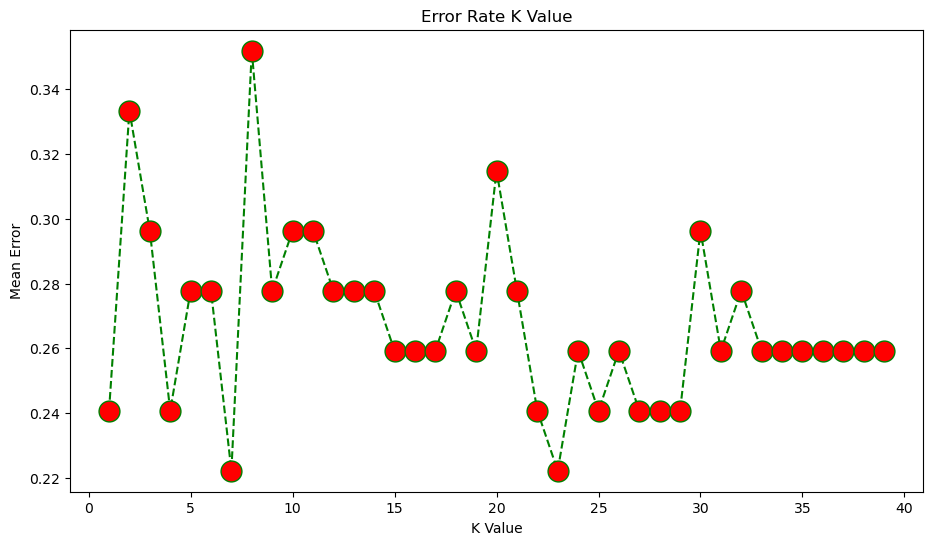

In [106]:
plt.figure(figsize=(11, 6))
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=15)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [109]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



# Q.4 Build a SVM Classifier and tune the hyperparameters to get the optimum model.

In [110]:
from sklearn.model_selection import GridSearchCV

In [114]:
from sklearn.svm import SVC

In [115]:
classifier_df = SVC(kernel = 'linear' , random_state = 0)
classifier_df.fit(x_train,y_train)
y_pred = classifier_df.predict(x_test)

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
acc = accuracy_score(y_test,y_pred) *100
print("Accuracy for our dataset in predicting test data is : {:.2f}%".format(acc))

Accuracy for our dataset in predicting test data is : 98.15%


In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
parameters = [{'C': [1,10,100], 'kernel': ['linear']}]
grid_search = GridSearchCV(estimator= classifier_df,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(x_train, y_train)

In [120]:
accuracy = grid_search.best_score_ *100

In [121]:
print("Accuracy for our dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our dataset with tuning is : 94.49%


In [122]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [129]:
svc = SVC()
svc.fit(x_train, y_train)
predictions = svc.predict(x_test)
print(classification_report(y_test, predictions))

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(x_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.74      0.91      0.82        22
           3       0.62      0.38      0.48        13

    accuracy                           0.78        54
   macro avg       0.75      0.73      0.73        54
weighted avg       0.77      0.78      0.76        54

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.375 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.400 total tim

# Q.5 Build a Naive Bayes Classifier and comment about its accuracy.

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [132]:
# shape of the dataset
print('Shape of training data :\n',x_train.shape)
print('Shape of testing data :\n',x_test.shape)

model = GaussianNB()

# fit the model with the training data
model.fit(x_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(x_train)
print('Target on train data:\n',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset :', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(x_test)
print('Target on test data:\n',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset :', accuracy_test,)

Shape of training data :
 (124, 13)
Shape of testing data :
 (54, 13)
Target on train data:
 [1 2 3 3 2 3 3 1 3 3 2 2 3 2 1 2 2 2 1 1 2 2 3 3 2 2 2 3 3 1 3 2 2 2 2 2 1
 1 2 1 3 1 3 1 1 2 1 2 2 1 3 2 1 2 2 2 3 1 3 3 1 1 2 3 1 1 2 2 1 1 1 3 2 1
 2 3 1 2 3 3 1 1 3 1 3 2 1 1 2 1 3 2 3 1 3 3 3 1 2 2 2 2 3 3 2 2 2 2 3 3 1
 1 3 2 2 2 1 1 1 2 2 2 1 3]
accuracy_score on train dataset : 0.9838709677419355
Target on test data:
 [1 3 2 1 2 2 1 3 2 2 3 3 1 1 3 2 1 1 3 1 1 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 1 1 2 2 2 1 3 2 3 1 3 3 1 3]
accuracy_score on test dataset : 0.9444444444444444


In [133]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


# Q.6 Compare all of the models and justify your choice about the optimum model.

In [136]:
print("---------------------------------------------")
print("Summary:")
print("---------------------------------------------")
print("Accuracy for KNN=0.72%")
print("Accuracy SVM=0.98%")
print("Accuracy NB=0.94%")
print("For this DATASET to get Optimal Classification results use SVM(classifier) or NB(classifier) ")

---------------------------------------------
Summary:
---------------------------------------------
Accuracy for KNN=0.72%
Accuracy SVM=0.98%
Accuracy NB=0.94%
For this DATASET to get Optimal Classification results use SVM(classifier) or NB(classifier) 
